# Session 2: Exploring the properties of your acoustic signal

## Goals
- Obtain audio (completed earlier 2025)
- Research confusion sounds --> humans + chorus frogs
- Create python notebook and:
  - Load audio files with the opensoundscape.Audio class, selecting a few seconds of audio containing the target sound
  - Create audio widgets for playback
  - Display spectrograms of the target sound using the opensoundscape.Spectrogram class
  - Compare visualizations of the sound when varying spectrogram creation parameters, especially the windows_samples argument (e.g. what does the spectrogram of the target sound look like with window_samples=256 vs 1024?)
  - Compare spectrograms and audio of the target sound with the confusion sounds
  - Visualize a few randomly selected files from your field data. What properties of the field audio data do you notice? Are these files different from or similar to your annotated data? Write these observations into this notebook
  - Add notebook to github repository

In [12]:
# Import Audio class from opso
from opensoundscape import Audio, audio

# Import Spectrogram class fromes from opso
from opensoundscape import Audio, Spectrogram
from pathlib import Path

In [8]:
# Load in an audio file from project
path = "/Users/hannahnossan/Documents/Projects/SINE2024/2nd_round_annot/2_annotate_stratified_v2/audio_clips/0000_MSD-1047_20240525_141000.WAV"
audio_object = Audio.from_file(path)

# returning audio_object from a cell displays player widget
audio_object

<Audio(samples=(960000,), sample_rate=32000)>

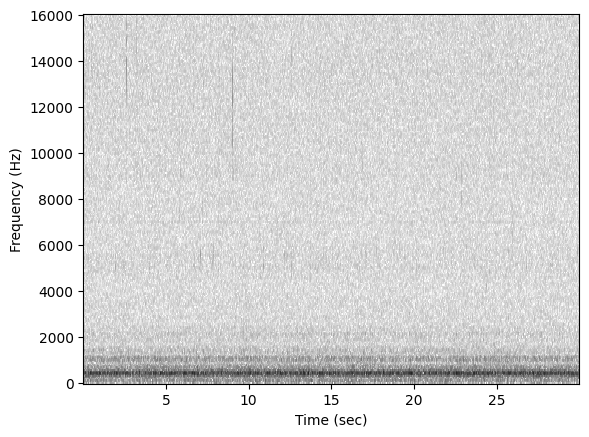

In [14]:
# Create spectrogram
spectrogram_object = Spectrogram.from_audio(audio_object)

# Plot spectrogram
# A spectrogram object can be visualized using its plot() method
spectrogram_object.plot()

## Compare visualizations of the sound when varying spectrogram parameters

In [17]:
# View documention about customizing parameters 
Spectrogram.from_audio?

Signature:
Spectrogram.from_audio(
    audio,
    window_type='hann',
    window_samples=None,
    window_length_sec=None,
    overlap_samples=None,
    overlap_fraction=None,
    fft_size=None,
    dB_scale=True,
    scaling='spectrum',
    **kwargs,
)
Docstring:
create a Spectrogram object from an Audio object

Args:
    audio: Audio object
    window_type="hann": see scipy.signal.spectrogram docs
    window_samples: number of audio samples per spectrogram window (pixel)
        - Defaults to 512 if window_samples and window_length_sec are None
        - Note: cannot specify both window_samples and window_length_sec
    window_length_sec: length of a single window in seconds
        - Note: cannot specify both window_samples and window_length_sec
        - Warning: specifying this parameter often results in less efficient
            spectrogram computation because window_samples will not be
            a power of 2.
    overlap_samples: number of samples shared by consecutive window

### Understanding the arguments
Spectrograms are created using windows. A window is a subset of consecutive samples of the original audio that is analyzed to create one pixel in the horizontal direction (one "coumn") on the resulting spectrogram. The appearance of a spectrogram depends on two parameters that control the size and spacing of these windows, the samples per window and the overlap of consecutive windows. 

Samples per window, window_samples
- the length (in audio samples) of each spectrogram window
- larger value for window_samples -> higher frequency resolution (more rows in a single spectrogram column)
- smaller value for window_samples -> higher time resolution

Overlap of consecutive windows, overlap_samples
- the number of audio samples that will be re-used (overlap) between two consecutive spectrograms
- using higher overlap percentages can sometimes yield better time resolution in a spectrogram but will take more computational time to generate

Spectrogram parameter trade offs
- when there is zero overlap between windows, the number of columns per second is equal to the size in Hz of each spectrogram row.

time and frequency resolution
- by modifying the window parameters explained above, we can adjust the time and frequency resolution of spectrograms

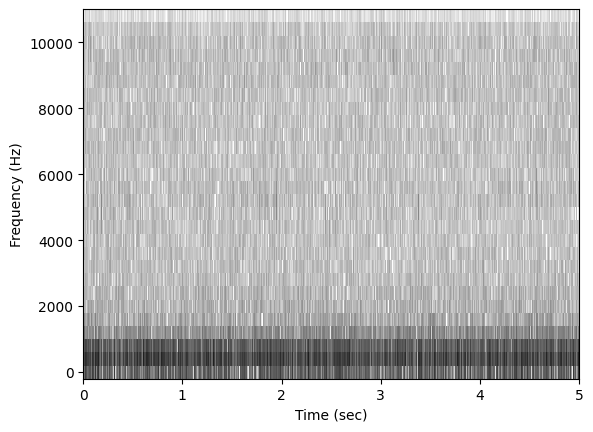

In [18]:
# Spectrogram with high time resolution
# Using window_samples=55 and overlap_samples=0 gives 55/22000 = 0.0025s of audio per window, or 1/0.0025 = 400 windows per s

# Load audio
audio = audio_object.resample(22000).trim(0,5)

spec = Spectrogram.from_audio(audio, window_samples=55, overlap_samples=0)
spec.plot()

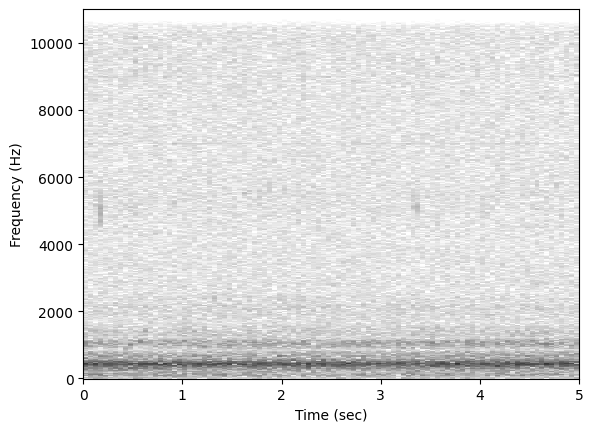

In [20]:
# Spectrogram with high frequency resolution
# Using window_samples=1100 and overlap_samples=0 gives 1100/22000 = 0.5s of audio per window, or 1/0.05 = 20 windows per second.
spec = Spectrogram.from_audio(audio, window_samples=1100, overlap_samples=0)
spec.plot()